<a href="https://colab.research.google.com/github/francis-100/algorithms_design/blob/main/Assignment_3_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**a. Derivation of the MST Heuristic from a Relaxed Version of the TSP**

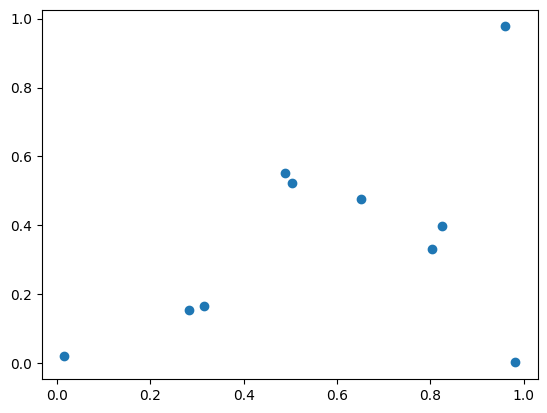

MST heuristic cost: 2.149364422424191


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_tsp_instance(n):
    points = [(random.random(), random.random()) for _ in range(n)]
    return points

def plot_points(points):
    plt.scatter(*zip(*points))
    plt.show()

def mst_heuristic(points):
    G = nx.complete_graph(len(points))
    pos = {i: point for i, point in enumerate(points)}
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            G[i][j]['weight'] = ((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2) ** 0.5
    mst = nx.minimum_spanning_tree(G)
    return sum(edge[2]['weight'] for edge in mst.edges(data=True))

# Example usage
num_cities = 10
points = generate_random_tsp_instance(num_cities)
plot_points(points)
mst_cost = mst_heuristic(points)
print("MST heuristic cost:", mst_cost)


####**b. Show that the MST Heuristic Dominates Straight-Line Distance**

In [2]:
def straight_line_distance(points):
    total_distance = 0
    for i in range(len(points) - 1):
        total_distance += ((points[i][0] - points[i+1][0]) ** 2 + (points[i][1] - points[i+1][1]) ** 2) ** 0.5
    return total_distance

# Example usage
straight_line_cost = straight_line_distance(points)
print("Straight-line distance heuristic cost:", straight_line_cost)
print("MST heuristic cost dominates:", mst_cost <= straight_line_cost)


Straight-line distance heuristic cost: 4.8702002667971955
MST heuristic cost dominates: True


####**c. Problem Generator for TSP Instances**

In [3]:
import random

def generate_tsp_instance(n):
    cities = [(random.random(), random.random()) for _ in range(n)]
    return cities

# Example usage
num_cities = 10
tsp_instance = generate_tsp_instance(num_cities)
print(tsp_instance)


[(0.7337529203025541, 0.462082544283128), (0.822844018264965, 0.6219795432451025), (0.022018447945832742, 0.17627340603527475), (0.8150368956476561, 0.5989306764600472), (0.21007533681282953, 0.08892888068222549), (0.16152517668155864, 0.8857494844196864), (0.7206621324946643, 0.9717959434441515), (0.633273142838259, 0.17339051629098878), (0.9248212359374112, 0.2745192283638507), (0.6825154717365435, 0.9484045339154248)]


####**d. Efficient MST Algorithm and Admissible Search Algorithm for TSP**

**Prim's Algorithm for Constructing the MST**

In [4]:
import heapq

def prim_mst(points):
    n = len(points)
    if n == 0:
        return 0
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            dist = ((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2) ** 0.5
            edges.append((dist, i, j))
    edges.sort()
    parent = list(range(n))

    def find(x):
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]

    def union(x, y):
        rootX = find(x)
        rootY = find(y)
        if rootX != rootY:
            parent[rootY] = rootX

    mst_cost = 0
    for cost, u, v in edges:
        if find(u) != find(v):
            union(u, v)
            mst_cost += cost
    return mst_cost

# Example usage
mst_cost = prim_mst(points)
print("MST cost using Prim's algorithm:", mst_cost)


MST cost using Prim's algorithm: 2.149364422424191


#### Admissible Search Algorithm (A* with MST Heuristic) for Solving the TSP

In [5]:
from heapq import heappush, heappop

def tsp_a_star(points):
    n = len(points)
    if n == 0:
        return 0

    def heuristic(current_path):
        remaining_points = set(range(n)) - set(current_path)
        if not remaining_points:
            return 0
        remaining_points = [points[i] for i in remaining_points]
        return mst_heuristic(remaining_points)

    start = 0
    pq = [(0 + heuristic([start]), 0, [start], 0)]
    while pq:
        est_total_cost, g_cost, current_path, current_node = heappop(pq)
        if len(current_path) == n:
            return g_cost + ((points[current_node][0] - points[start][0]) ** 2 + (points[current_node][1] - points[start][1]) ** 2) ** 0.5

        for next_node in range(n):
            if next_node not in current_path:
                new_path = current_path + [next_node]
                new_g_cost = g_cost + ((points[current_node][0] - points[next_node][0]) ** 2 + (points[current_node][1] - points[next_node][1]) ** 2) ** 0.5
                heappush(pq, (new_g_cost + heuristic(new_path), new_g_cost, new_path, next_node))

# Example usage
tsp_cost = tsp_a_star(points)
print("TSP cost using A* with MST heuristic:", tsp_cost)


TSP cost using A* with MST heuristic: 3.823310807096604
